# JLS corpus analyses

This is the code used to generate all graphs that are based on the JLS corpus. Since the fulltext of the journal is copyrighted, the data cannot be published. You need to download the PDFs via your institutional subscription and extract the raw text yourself. Each article must have its own file, named according to the DOI of the article, with slashes replaced by an underscore, and the `.txt` file extension. Then adapt the `corpus_dir` variable below to point the code to the directory containing all files. You might have to update the file `data/jls-doi-to-year.csv` to add DOI-year mappings for newly published articles.

## Setup

Needs to be run only once, uncomment to run

In [1]:
#!pip install nltk mplcursors tqdm langdetect langcodes language_data seaborn
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
%matplotlib inline

## Load or generate dataset

In [4]:
import os
import pickle
from scripts.utils import create_corpus, DOICache
from dotenv import load_dotenv
load_dotenv()
if not os.path.exists('cache/jls-corpus.pkl'):
    corpus_dir = os.getenv('CORPUS_BASE_DIR') + '/FULLTEXTS/JLS/jls-txt'
    doi_cache = DOICache("data/jls-doi-to-year.csv")
    articles_df = create_corpus(corpus_dir, doi_cache)
    with open('cache/jls-corpus.pkl', mode='wb') as f:
        pickle.dump(articles_df, f)
else:
    with open('cache/jls-corpus.pkl', mode='rb') as f:
        articles_df = pickle.load(f)
articles_df

,doi,text,year,title,author
1141,10.2307/1409866,SOME JOBS FOR JURISPRUDEN...,1974.0,Some Jobs for Jurisprudence,Twining
1147,10.2307/1409872,Book Reviews...,1974.0,The Legal Structure,Sumner
1146,10.2307/1409871,effortsto drawto the attentionof those respons...,1974.0,Co-Operation between Lawyers and Sociologists:...,Treves
1145,10.2307/1409870,HOMELESSNESS: CAN THE COURTS CONTRIBUTE...,1974.0,Homelessness: Can the Courts Contribute?,James
1144,10.2307/1409869,SOCIAL ACTION AND A METHODOLOGY FOR TH...,1974.0,Social Action and a Methodology for the Sociol...,Grace
...,...,...,...,...,...
920,10.1111/jols.12302.x,Socio-Legal\nNEWSLETTER ...,NaN,None,
921,10.1111/jols.12303.x,Socio-Legal\nNEWSLETTER ...,NaN,None,
933,10.1111/jols.12315.x,Socio-Legal\nNEWSLETTER ...,NaN,None,
934,10.1111/jols.12316.x,Socio-Legal\nNEWSLETTER ...,NaN,None,


## Theoretical influences

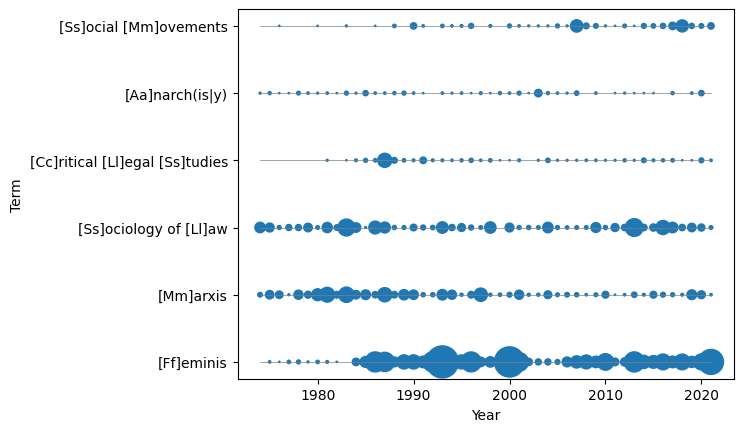

In [3]:
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
data = prepare_data(articles_df, [r'[Ff]eminis',r'[Mm]arxis', r'[Ss]ociology of [Ll]aw',r'[Cc]ritical [Ll]egal [Ss]tudies', r'[Aa]narch(is|y)',r'[Ss]ocial [Mm]ovements'])
plot_by_year(data, file="docs/jls-ts-tf-theoretical-influences.png")


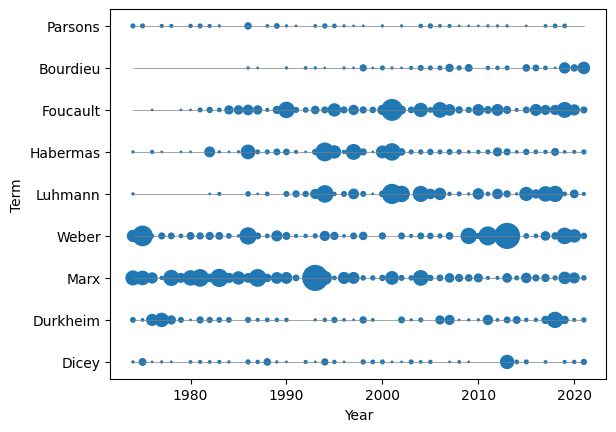

In [4]:
data = prepare_data(articles_df, ['Dicey', 'Durkheim', 'Marx', 'Weber', 'Luhmann', 'Habermas', 'Foucault', 'Bourdieu', 'Parsons'])
plot_by_year(data, file='docs/jls-ts-tf-sociolegal-classics.png')

## Topicality

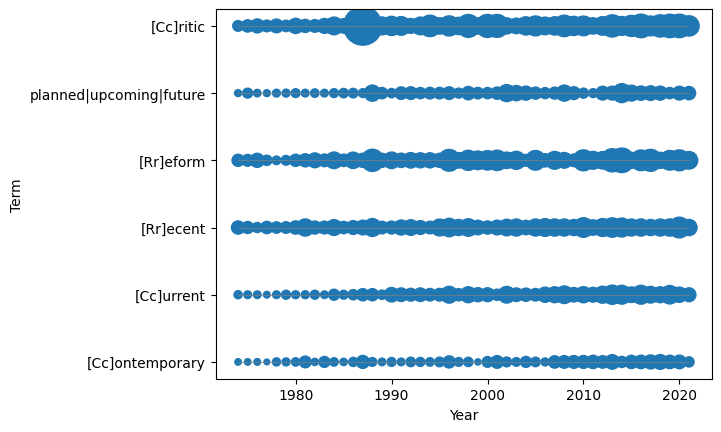

In [10]:
data = prepare_data(articles_df, [r'[Cc]ontemporary' , r'[Cc]urrent' , r'[Rr]ecent' , r'[Rr]eform',  r'planned|upcoming|future', r'[Cc]ritic'])
plot_by_year(data, file='docs/jls-ts-tf-topicality.png')

## Teaching, Research & Evaluation

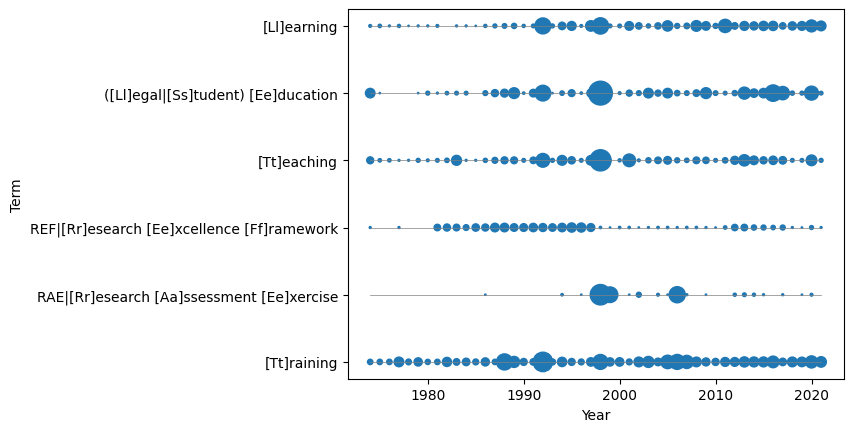

In [6]:
data = prepare_data(articles_df, [r'[Tt]raining',r'RAE|[Rr]esearch [Aa]ssessment [Ee]xercise',r'REF|[Rr]esearch [Ee]xcellence [Ff]ramework', r'[Tt]eaching',r'([Ll]egal|[Ss]tudent) [Ee]ducation', r'[Ll]earning'])
plot_by_year(data, file='docs/jls-ts-tf-teaching-research-evaluation.png')

## Theory and Method

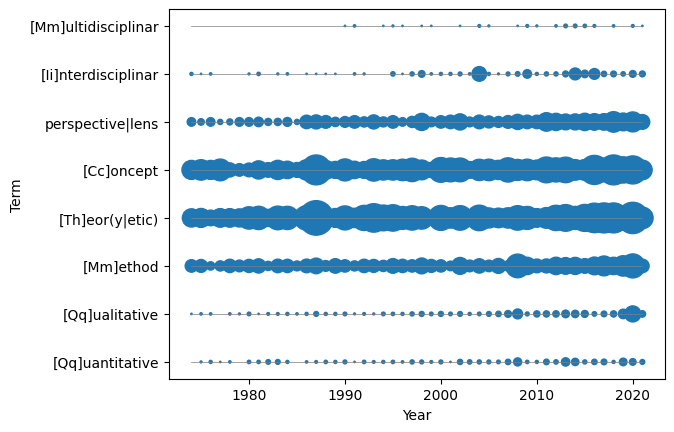

In [7]:
data = prepare_data(articles_df, [r'[Qq]uantitative' , r'[Qq]ualitative' , r'[Mm]ethod',  r'[Th]eor(y|etic)', r'[Cc]oncept', r'perspective|lens', r'[Ii]nterdisciplinar', r'[Mm]ultidisciplinar'])
plot_by_year(data, file="docs/jls-ts-tf-theory-method.png")

## Data/empirical methods

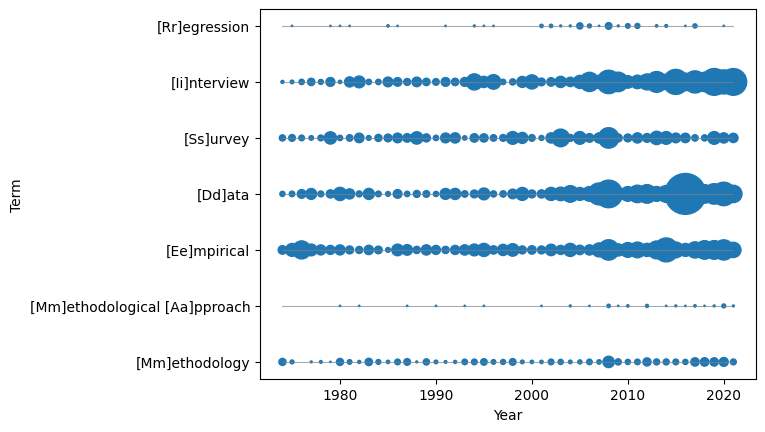

In [8]:
data = prepare_data(articles_df, [r'[Mm]ethodology' , r'[Mm]ethodological [Aa]pproach', '[Ee]mpirical', "[Dd]ata", "[Ss]urvey", "[Ii]nterview", "[Rr]egression"])
plot_by_year(data, file="docs/jls-ts-tf-empirical-methods.png")

## Disciplinary influences

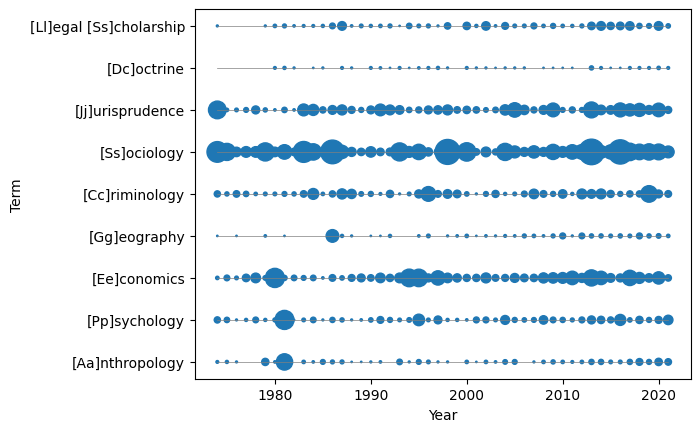

In [6]:
data = prepare_data(articles_df, [r'[Aa]nthropology' , r'[Pp]sychology' , r'[Ee]conomics', r'[Gg]eography',  r'[Cc]riminology', '[Ss]ociology', '[Jj]urisprudence', '[Dc]octrine', '[Ll]egal [Ss]cholarship'])
plot_by_year(data, file="docs/jls-ts-tf-disciplines.png")